# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

### Facebook Live Sellers in Thailand
Deskripsi dataset:
* Facebook pages of 10 Thai fashion and cosmetics retail sellers. Posts of a different nature (video, photos, statuses, and links). Engagement metrics consist of comments, shares, and reactions.
* sumber: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

In [6]:
df = pd.read_csv("drive/MyDrive/dicoding/dataset/Dataset_clustering.csv")
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Struktur data

In [7]:
# drop irrelevant columns
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4', 'status_id'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 606.0+ KB


terdapat 2512 baris dan 16 kolom

## Identifikasi missing value dan duplikasi baris


In [9]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [10]:
print(f'Duplicated rows: {df.duplicated().sum()}')

Duplicated rows: 54


## Distribusi data beserta visualisasinya

In [11]:
df.describe(include='all')

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
unique,4,6913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,photo,3/20/2018 1:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4288,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,NaN,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
# select features based on data types
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(include=['object']).columns

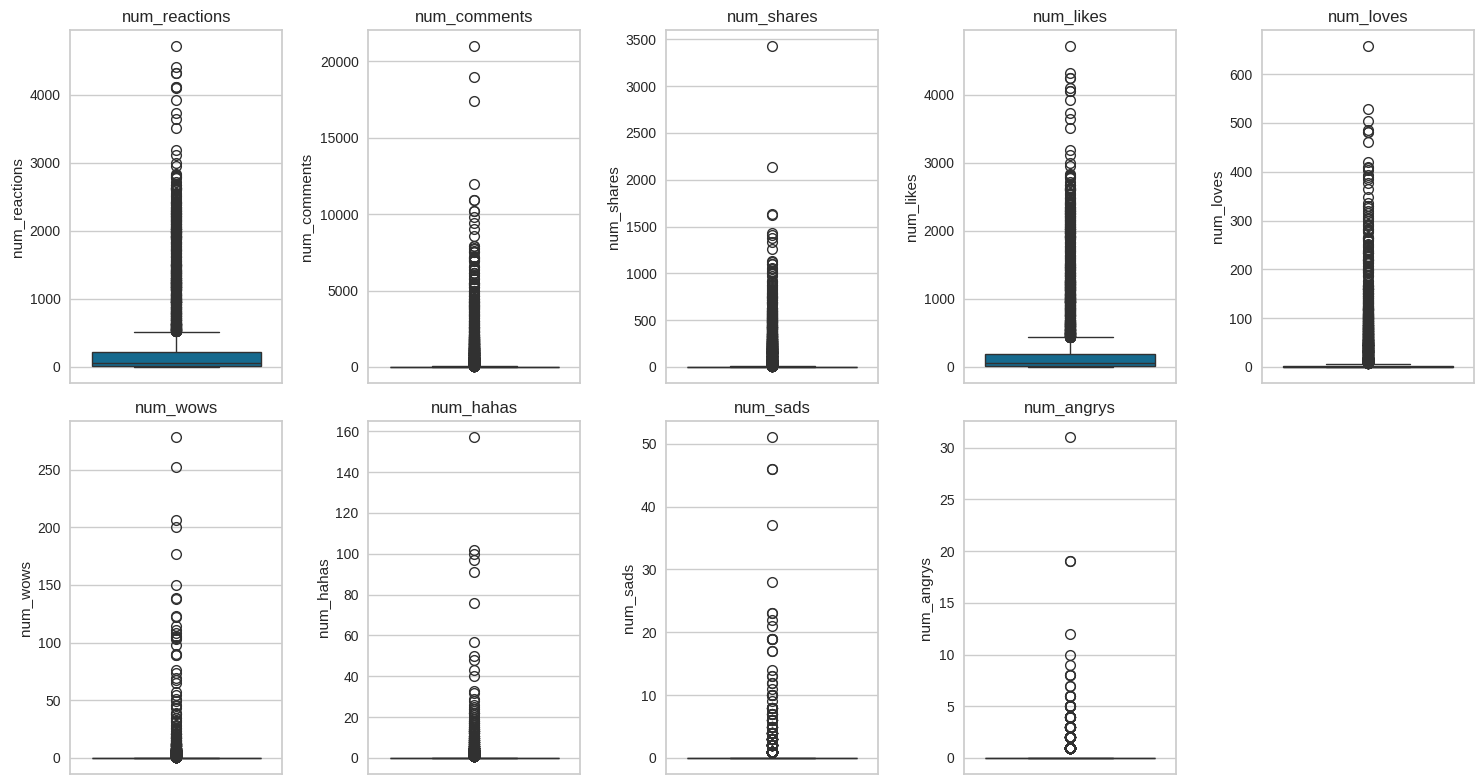

In [13]:
num_features = len(numerical_features)
cols = 5
rows = (num_features // cols) + (num_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(df[col], ax=axes[i], orient='v')
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

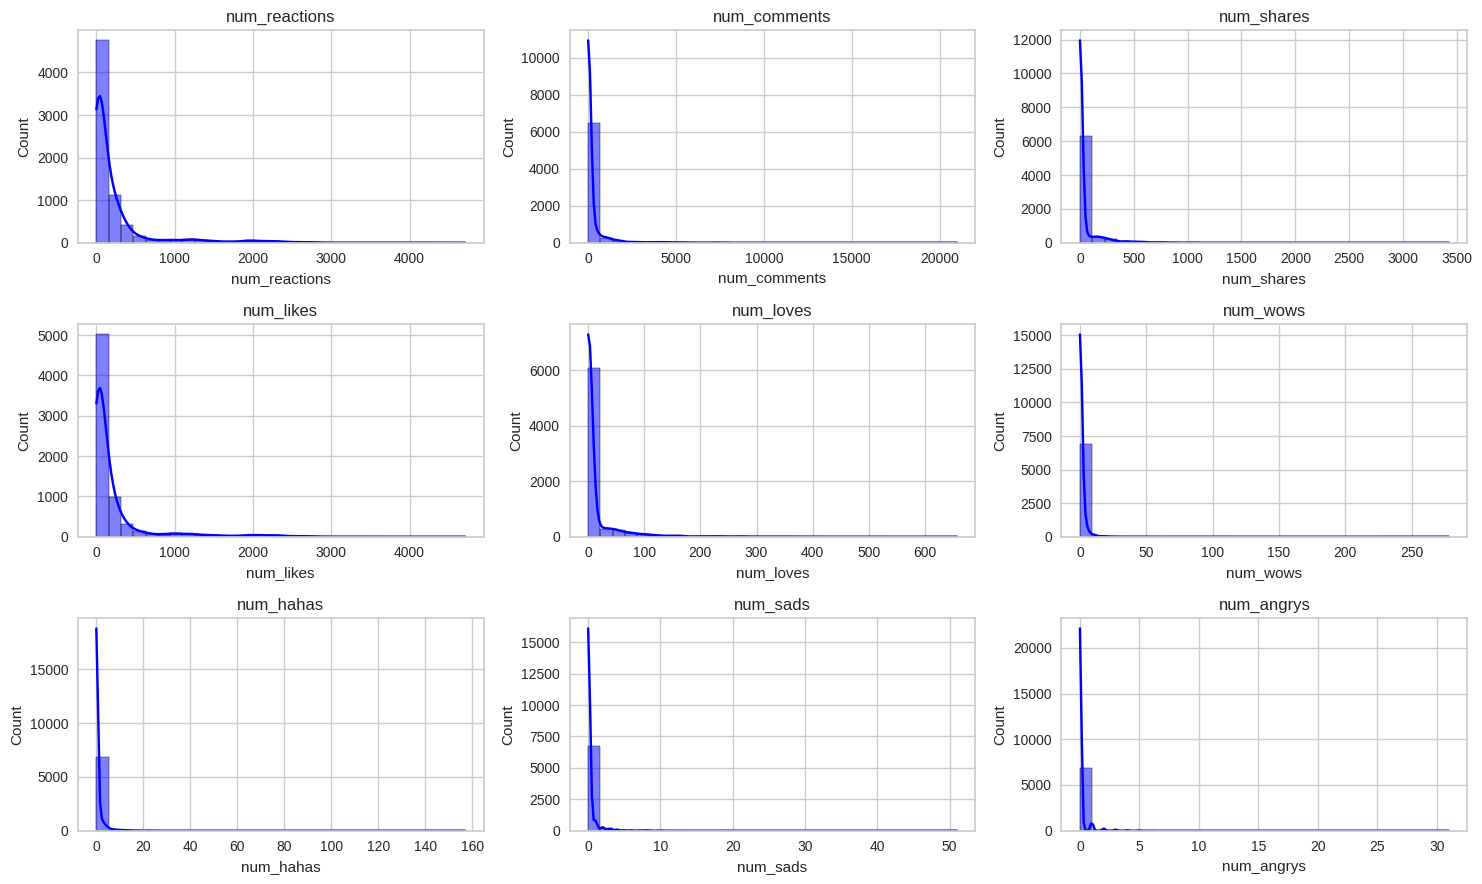

In [14]:
cols = 3
rows = (num_features // cols) + (num_features % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))

# Flatten axes untuk memudahkan iterasi jika lebih dari 1 kolom
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], ax=axes[i], kde=True, color='blue', bins=30)
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

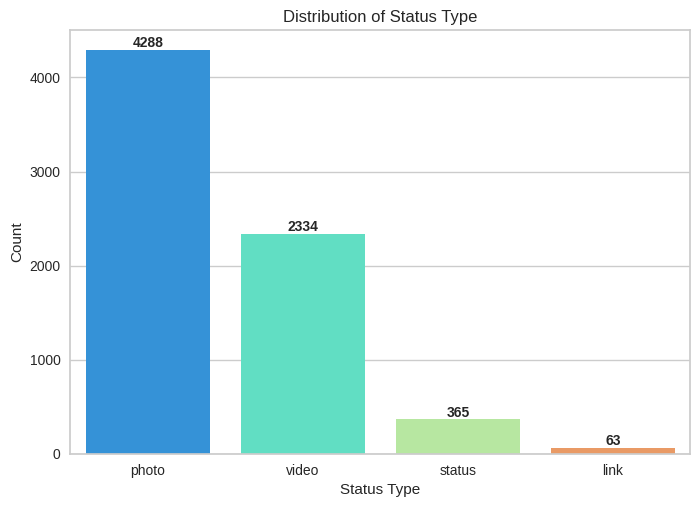

In [15]:
# Sort the status_type counts in descending order
status_counts = df['status_type'].value_counts().sort_values(ascending=False)

# Create the barplot with sorted values
ax = sns.barplot(x=status_counts.index,
                 y=status_counts.values,
                 hue=status_counts.index,
                 legend=False,
                 palette='rainbow')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.title('Distribution of Status Type')
plt.show()


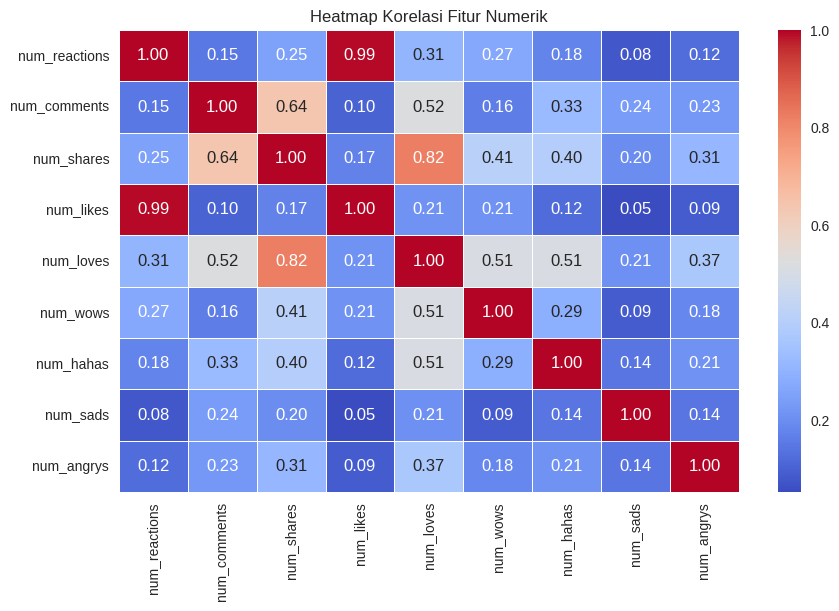

In [16]:
# Hitung korelasi
correlation_matrix = df[numerical_features].corr()

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Perlu dilakukan penanganan duplikasi baris, outlier, perubahan tipe data, standarisasi fitur, dan encoding data kategorikal dengan label encoder

In [17]:
df = df.drop_duplicates()
print(f'duplicated rows: {df.duplicated().sum()}')

duplicated rows: 0


Mengingat kolom numerik didominasi oleh right-skewed, maka log transformasi akan digunakan sebelum menerapkan metode IQR untuk meminimalkan kehilangan banyak informasi penting

In [18]:
# prevent other numeric feature to loose information because of extreme right-skewed
selected_numerical_features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes']

# Apply log transformation to reduce skewness
df_log = df.copy()
for feature in selected_numerical_features:
    df_log[feature] = np.log1p(df_log[feature])

# Compute IQR on log-transformed data
Q1 = df_log[selected_numerical_features].quantile(0.25)
Q3 = df_log[selected_numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply IQR filtering
condition = ~((df_log[selected_numerical_features] < lower_bound) |
              (df_log[selected_numerical_features] > upper_bound)).any(axis=1)

print("Before outlier removal:", df.shape)
df = df.loc[condition].reset_index(drop=True)
print("After outlier removal:", df.shape)


Before outlier removal: (6996, 11)
After outlier removal: (6028, 11)


In [19]:
numerical_features = list(numerical_features)
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')
df['days_since_start'] = (df['status_published'] - df['status_published'].min()).dt.days
numerical_features.append('days_since_start')

In [20]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [21]:
encoder = LabelEncoder()
df['status_type'] = encoder.fit_transform(df['status_type'])

In [22]:
selected_features = df.drop(columns=['status_published']).columns
print(f'Selected features: {selected_features}')

# Save as an array
x = df[selected_features].values

Selected features: Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'days_since_start'],
      dtype='object')


In [23]:
df.describe()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,days_since_start
count,6028.000000,6028,6028.000000,6.028000e+03,6.028000e+03,6028.000000,6.028000e+03,6.028000e+03,6.028000e+03,6.028000e+03,6.028000e+03,6.028000e+03
mean,1.515926,2016-09-10 10:26:17.906436608,0.000000,1.414485e-17,-4.479201e-17,0.000000,-2.828969e-17,-7.543918e-17,1.178737e-17,-7.072423e-18,-1.885979e-17,-1.508784e-16
min,0.000000,2012-07-15 02:51:00,-0.443463,-2.509030e-01,-3.420694e-01,-0.438200,-2.682391e-01,-2.508269e-01,-1.008894e-01,-9.626078e-02,-6.428367e-02,-2.104872e+00
25%,1.000000,2015-09-03 15:09:15,-0.409060,-2.509030e-01,-3.420694e-01,-0.405976,-2.682391e-01,-2.508269e-01,-1.008894e-01,-9.626078e-02,-6.428367e-02,-5.163517e-01
50%,1.000000,2017-10-03 06:53:30,-0.351723,-2.297925e-01,-3.420694e-01,-0.348432,-2.682391e-01,-2.508269e-01,-1.008894e-01,-9.626078e-02,-6.428367e-02,5.375771e-01
75%,2.000000,2018-02-14 20:33:15,-0.087970,-1.453503e-01,-2.064297e-01,-0.092939,-1.386658e-01,-2.508269e-01,-1.008894e-01,-9.626078e-02,-6.428367e-02,7.240948e-01
max,3.000000,2018-06-13 01:12:00,10.358945,2.050076e+01,6.982473e+00,10.403024,2.823789e+01,2.891208e+01,5.467316e+01,3.789252e+01,5.193814e+01,8.877311e-01
std,0.859025,NaN,1.000083,1.000083e+00,1.000083e+00,1.000083,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### K-Means Clustering

In [24]:
# K-Means before PCA
silhouette_scores_before = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_scores_before.append(silhouette_score(x, cluster_labels))

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### Elbow Method

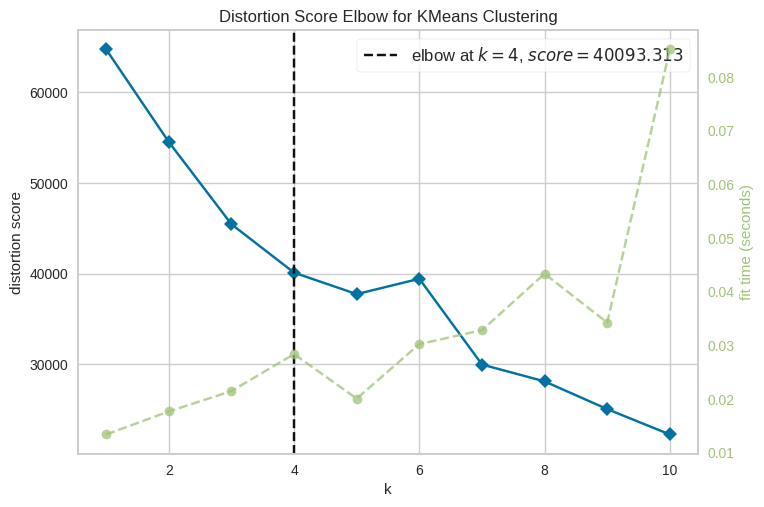

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 11))
visualizer.fit(x)
visualizer.show()

### Silhouette Score

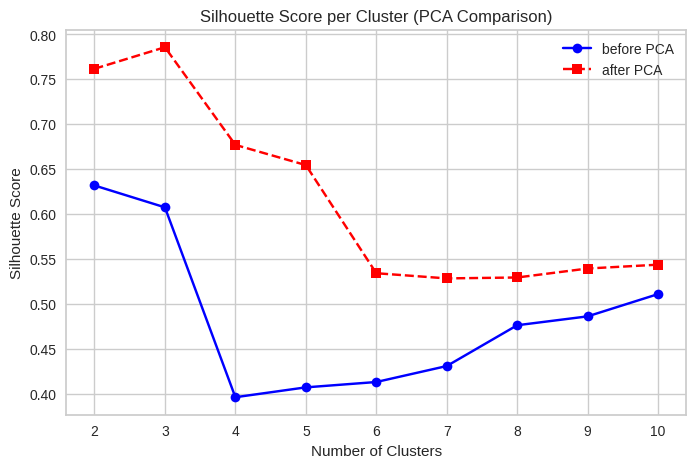

In [26]:
# PCA for dimension reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# K-Means after PCA
silhouette_scores_after = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(x_pca)
    silhouette_scores_after.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores_before, marker='o',  label='before PCA', color='blue')
plt.plot(k_range, silhouette_scores_after, marker='s', linestyle='dashed', label='after PCA', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score per Cluster (PCA Comparison)')
plt.legend()
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### Embedded Method

In [27]:
# Filtered df without datetime feature
df_numeric = df.select_dtypes(include=['number'])

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_numeric['Cluster'] = kmeans.fit_predict(x_pca)
y = df_numeric['Cluster']

# Feature Selection menggunakan Random Forest (Embedded Method)
def random_forest_selection(x, y, feature_names, n_features=5):
    model = RandomForestClassifier(random_state=42)
    model.fit(x, y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[-n_features:]
    selected_features = [feature_names[i] for i in indices]  # Get feature names
    return x[:, indices], selected_features

feature_names = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'days_since_start']

# Test Random Forest Feature Selection
result_x, selected_features = random_forest_selection(x, y, feature_names)
print("Selected Features:", selected_features)

Selected Features: ['num_loves', 'num_comments', 'num_reactions', 'num_shares', 'num_likes']


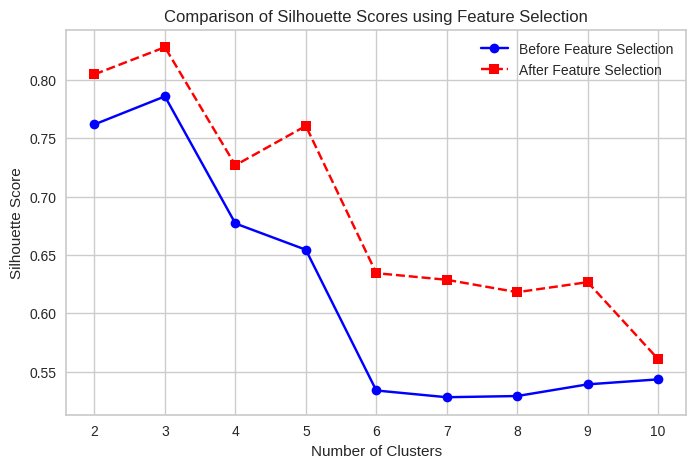

In [28]:
# ensure that there's at least 1 categorical column (add status_type)
selected_features = ['status_type','num_loves', 'num_comments', 'num_reactions', 'num_shares', 'num_likes']
x_feature_selection = df[selected_features].values

pca = PCA(n_components=2)
x_pca_feature_selection = pca.fit_transform(x_feature_selection)

silhouette_scores_after_feature_selection = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(x_pca_feature_selection)
    silhouette_scores_after_feature_selection.append(silhouette_score(x_pca_feature_selection, cluster_labels))


plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores_after, marker='o', label='Before Feature Selection', color='blue')
plt.plot(k_range, silhouette_scores_after_feature_selection, marker='s', linestyle='--', label='After Feature Selection', color='red')

# Labels, Title, and Legend
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores using Feature Selection')
plt.legend()
plt.show()

feature selection menunjukkan peningkatan silhouette score secara signifikan, maka dari itu model yang telah menggunakan feature selection akan digunakan untuk clustering

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

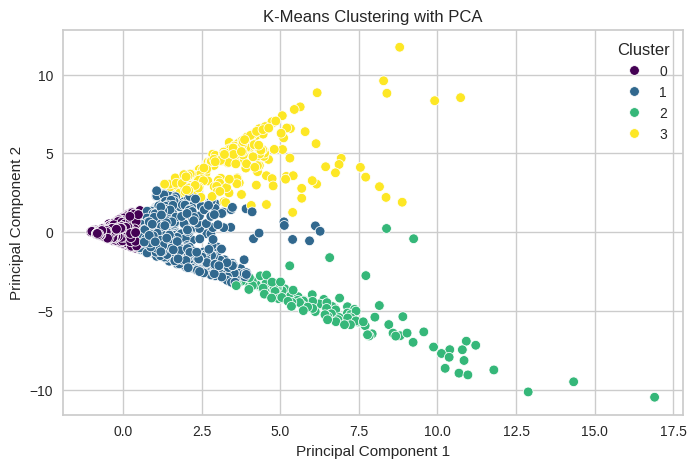

Final Silhouette Score: 0.7267817134659156


In [29]:
# Visualize Cluster
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(x_pca_feature_selection)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=x_pca_feature_selection[:, 0], y=x_pca_feature_selection[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

silhouette_avg = silhouette_score(x_pca_feature_selection, kmeans.labels_)
print(f"Final Silhouette Score: {silhouette_avg}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [30]:
df_normalized = df
df_normalized['status_type'] = encoder.inverse_transform(df_normalized[['status_type']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [31]:
df_normalized[numerical_features] = scaler.inverse_transform(df_normalized[numerical_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [32]:
def analyze_clusters(df):
    print("Analisis Karakteristik Setiap Cluster:")
    clusters = df['Cluster'].unique()

    for cluster_id in sorted(clusters):
        # Mengambil data untuk cluster saat ini
        cluster_data = df[df['Cluster'] == cluster_id]

        # Menghitung modus untuk status_type
        status_type_mode = cluster_data['status_type'].mode()[0]

        # Menghitung mean untuk fitur numerik
        mean_num_loves = cluster_data['num_loves'].mean()
        mean_num_comments = cluster_data['num_comments'].mean()
        mean_num_reactions = cluster_data['num_reactions'].mean()
        mean_num_shares = cluster_data['num_shares'].mean()
        mean_num_likes = cluster_data['num_likes'].mean()

        # Menampilkan hasil
        print(f"\n📌 Cluster {cluster_id + 1}:")
        print(f"Modus Status Type: {status_type_mode}")
        print(f"Rata-rata Num Loves: {mean_num_loves:.2f}")
        print(f"Rata-rata Num Comments: {mean_num_comments:.2f}")
        print(f"Rata-rata Num Reactions: {mean_num_reactions:.2f}")
        print(f"Rata-rata Num Shares: {mean_num_shares:.2f}")
        print(f"Rata-rata Num Likes: {mean_num_likes:.2f}")
        print("=" * 50)

analyze_clusters(df_normalized)

Analisis Karakteristik Setiap Cluster:

📌 Cluster 1:
Modus Status Type: photo
Rata-rata Num Loves: 0.68
Rata-rata Num Comments: 5.51
Rata-rata Num Reactions: 66.65
Rata-rata Num Shares: 0.69
Rata-rata Num Likes: 65.45

📌 Cluster 2:
Modus Status Type: photo
Rata-rata Num Loves: 6.86
Rata-rata Num Comments: 74.32
Rata-rata Num Reactions: 458.10
Rata-rata Num Shares: 10.47
Rata-rata Num Likes: 448.08

📌 Cluster 3:
Modus Status Type: video
Rata-rata Num Loves: 36.90
Rata-rata Num Comments: 508.78
Rata-rata Num Reactions: 293.73
Rata-rata Num Shares: 36.94
Rata-rata Num Likes: 252.46

📌 Cluster 4:
Modus Status Type: photo
Rata-rata Num Loves: 1.78
Rata-rata Num Comments: 33.52
Rata-rata Num Reactions: 1933.55
Rata-rata Num Shares: 3.83
Rata-rata Num Likes: 1930.11


## **Analisis Karakteristik Cluster dari Model KMeans**  


### **📌 Cluster 1: Konten dengan Keterlibatan Rendah**  
- **Modus Status Type**: *Photo*  
- **Rata-rata Num Loves**: 0.68  
- **Rata-rata Num Comments**: 5.51  
- **Rata-rata Num Reactions**: 66.65  
- **Rata-rata Num Shares**: 0.69  
- **Rata-rata Num Likes**: 65.45  

**Analisis:**  
Cluster ini mencerminkan postingan dengan keterlibatan (*engagement*) yang rendah. Postingan dalam cluster ini cenderung mendapatkan sedikit interaksi dari pengguna, baik dalam bentuk *likes*, *comments*, *shares*, maupun *reactions*. Kemungkinan besar, konten dalam cluster ini kurang menarik atau kurang relevan bagi audiens, atau mungkin diposting pada waktu yang kurang optimal.  

---

### **📌 Cluster 2: Konten dengan Keterlibatan Sedang**  
- **Modus Status Type**: *Photo*  
- **Rata-rata Num Loves**: 6.86  
- **Rata-rata Num Comments**: 74.32  
- **Rata-rata Num Reactions**: 458.10  
- **Rata-rata Num Shares**: 10.47  
- **Rata-rata Num Likes**: 448.08  

**Analisis:**  
Cluster ini menunjukkan postingan yang memiliki daya tarik lebih tinggi dibandingkan Cluster 1. Dengan jumlah *likes*, *reactions*, dan *comments* yang lebih tinggi, postingan dalam cluster ini lebih menarik perhatian pengguna. Hal ini menunjukkan bahwa konten foto dalam cluster ini lebih efektif dalam menarik interaksi, meskipun masih kalah dengan cluster yang memiliki tingkat keterlibatan lebih tinggi.  

---

### **📌 Cluster 3: Konten Video dengan Keterlibatan Tinggi**  
- **Modus Status Type**: *Video*  
- **Rata-rata Num Loves**: 36.90  
- **Rata-rata Num Comments**: 508.78  
- **Rata-rata Num Reactions**: 293.73  
- **Rata-rata Num Shares**: 36.94  
- **Rata-rata Num Likes**: 252.46  

**Analisis:**  
Cluster ini terdiri dari postingan video yang mendapatkan jumlah komentar dan *shares* yang sangat tinggi. Konten dalam cluster ini tampaknya sangat menarik bagi pengguna, sehingga mendorong mereka untuk berinteraksi lebih banyak. Jumlah *loves* yang lebih tinggi dibandingkan cluster lainnya menunjukkan bahwa konten video lebih mampu membangun keterikatan emosional dengan audiens.  

---

### **📌 Cluster 4: Konten Foto dengan Popularitas Tinggi**  
- **Modus Status Type**: *Photo*  
- **Rata-rata Num Loves**: 1.78  
- **Rata-rata Num Comments**: 33.52  
- **Rata-rata Num Reactions**: 1933.55  
- **Rata-rata Num Shares**: 3.83  
- **Rata-rata Num Likes**: 1930.11  

**Analisis:**  
Cluster ini berisi postingan dengan jumlah *likes* dan *reactions* yang sangat tinggi, menunjukkan bahwa konten dalam cluster ini sangat populer di kalangan pengguna. Meskipun jumlah komentar tidak setinggi Cluster 3, jumlah *reactions* yang tinggi mengindikasikan bahwa postingan dalam cluster ini mampu menarik perhatian yang besar, meskipun tidak selalu mendorong diskusi aktif.  

---

## **Apakah Hasil Clustering Sesuai dengan Ekspektasi dan Logika Bisnis?**  
Hasil clustering ini cukup sesuai dengan ekspektasi dan logika bisnis, terutama dalam kaitannya dengan pola interaksi pengguna terhadap berbagai jenis konten. Pola yang muncul menunjukkan bahwa:
- **Konten video memiliki potensi interaksi tertinggi dalam bentuk komentar dan *shares***, yang sesuai dengan tren bahwa video lebih mudah viral dan menarik diskusi dibandingkan foto.
- **Foto tetap menjadi format konten favorit**, terbukti dari tingginya jumlah *likes* dan *reactions* di Cluster 4.
- **Postingan dengan interaksi rendah (Cluster 1) menunjukkan adanya konten yang kurang menarik**, yang bisa menjadi bahan evaluasi untuk peningkatan strategi konten.

## **Pola yang Bisa Dimanfaatkan**  
Berdasarkan analisis ini, beberapa pola yang dapat dimanfaatkan untuk strategi pemasaran digital adalah:
1. **Gunakan lebih banyak konten video** untuk meningkatkan interaksi dalam bentuk komentar dan *shares*, terutama jika tujuan utamanya adalah meningkatkan engagement organik.
2. **Optimalkan penggunaan foto yang menarik** untuk meningkatkan jumlah *likes* dan *reactions*, sehingga dapat meningkatkan daya tarik visual konten.
3. **Pelajari karakteristik konten di Cluster 1** untuk mengidentifikasi elemen-elemen yang menyebabkan kurangnya keterlibatan pengguna, lalu lakukan perbaikan dalam strategi postingan.
4. **Jadwalkan waktu posting yang optimal** berdasarkan pola keterlibatan yang terlihat dalam cluster dengan engagement tinggi, guna meningkatkan efektivitas distribusi konten.

Dengan memahami hasil clustering ini, strategi konten dapat lebih disesuaikan dengan preferensi audiens, sehingga meningkatkan efektivitas dan dampak dari kampanye digital secara keseluruhan.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [33]:
df_normalized

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,days_since_start,Cluster
0,photo,2018-04-21 22:45:00,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,2106.0,0
1,photo,2018-04-21 02:29:00,111.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,2105.0,0
2,photo,2018-04-18 03:22:00,213.0,0.0,0.0,204.0,9.0,0.0,0.0,0.0,0.0,2103.0,0
3,photo,2018-04-18 02:14:00,217.0,6.0,0.0,211.0,5.0,1.0,0.0,0.0,0.0,2102.0,0
4,video,2018-04-17 07:42:00,295.0,453.0,53.0,260.0,32.0,1.0,1.0,0.0,1.0,2102.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,photo,2016-09-24 02:58:00,89.0,0.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,1532.0,0
6024,photo,2016-09-23 11:19:00,16.0,0.0,0.0,14.0,1.0,0.0,1.0,0.0,0.0,1531.0,0
6025,photo,2016-09-21 23:03:00,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1529.0,0
6026,photo,2016-09-20 00:43:00,351.0,12.0,22.0,349.0,2.0,0.0,0.0,0.0,0.0,1527.0,1


In [34]:
df_normalized.to_csv("Dataset_inisiasi.csv", index=False)